Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    

c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2096 - loss: 1.1133 - val_accuracy: 0.8116 - val_loss: 0.9186
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7895 - loss: 0.8567 - val_accuracy: 0.8696 - val_loss: 0.7098
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8356 - loss: 0.6790 - val_accuracy: 0.8841 - val_loss: 0.5536
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8513 - loss: 0.5445 - val_accuracy: 0.9275 - val_loss: 0.4351
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8934 - loss: 0.4169 - val_accuracy: 0.9420 - val_loss: 0.3440
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9241 - loss: 0.3367 - val_accuracy: 0.9710 - val_loss: 0.2776
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9513 - loss: 0.2603 - val_accuracy: 0.9710 - val_loss: 0.2261
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9277 - loss: 0.2476 - val_accuracy: 0.9855 - val_loss: 0.1918
Epoch 9/50


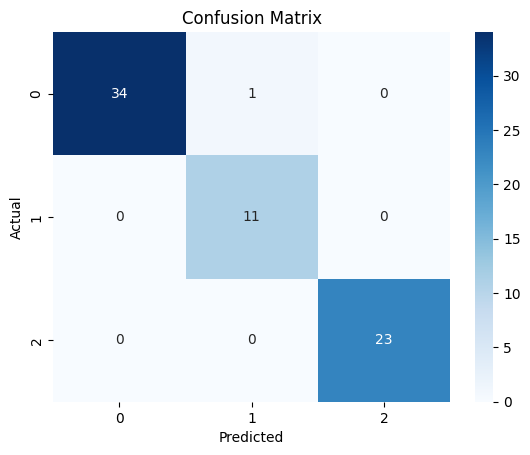

<Figure size 800x600 with 0 Axes>

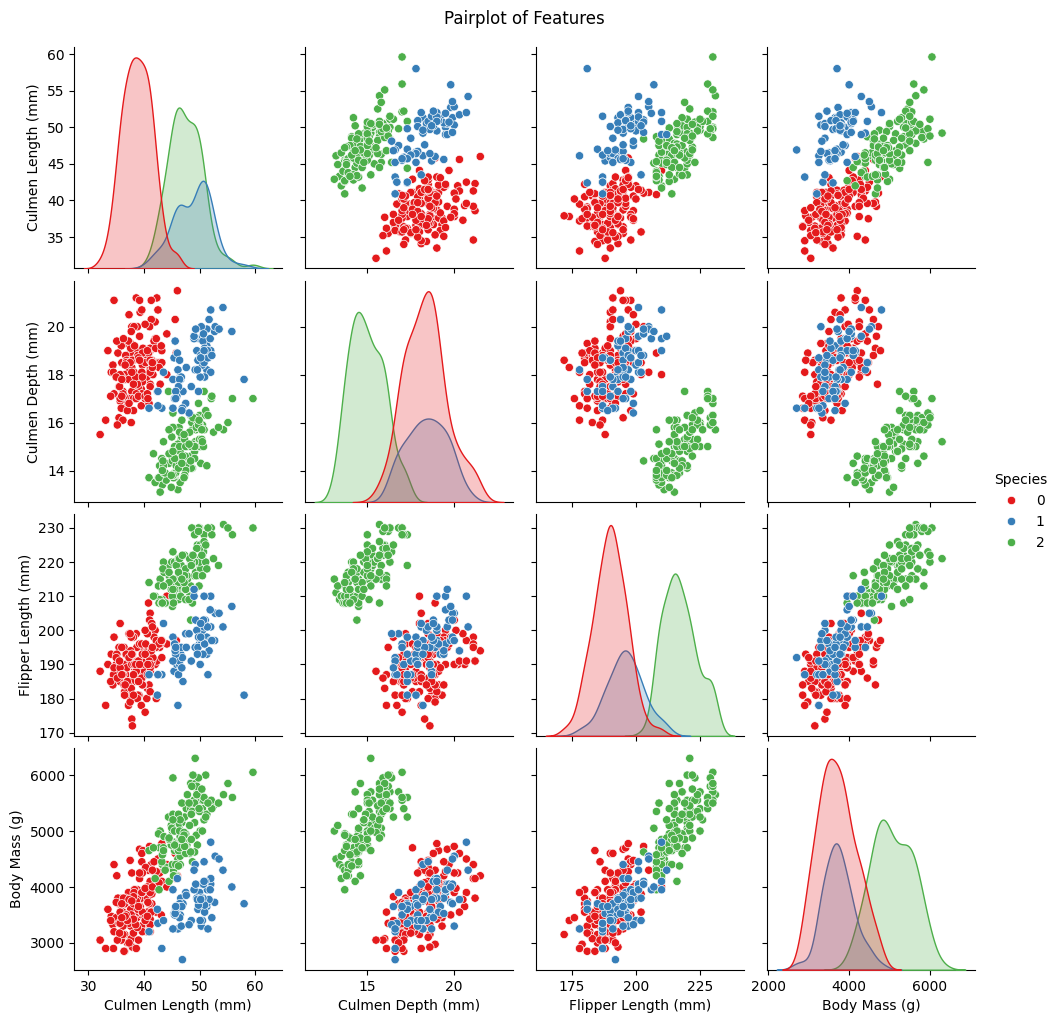

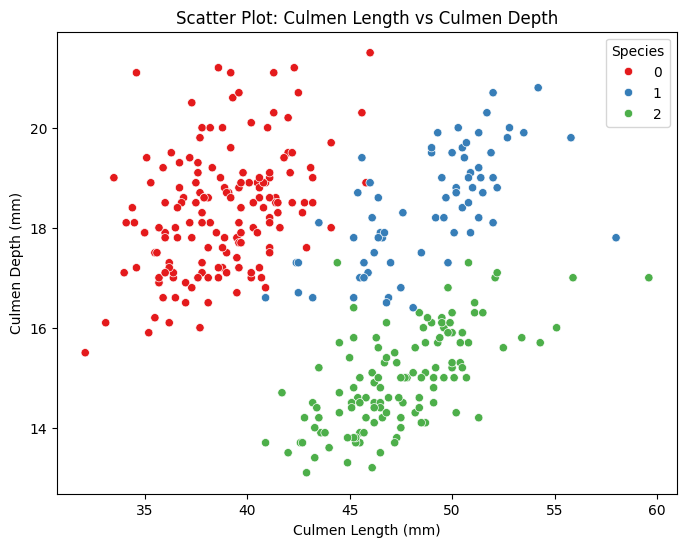

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# بارگذاری داده‌ها
file_path = "C:/Users/A.S.T.co/Downloads/penguins.csv"
penguins = pd.read_csv(file_path)

# نمایش اطلاعات اولیه داده‌ها
print("Initial Data Info:")
print(penguins.info())
print("Missing Values:\n", penguins.isnull().sum())

# انتخاب ویژگی‌ها و متغیر هدف
features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
target_name = "Species"

# حذف داده‌های گم‌شده
penguins = penguins[features + [target_name]].dropna()

# تبدیل برچسب هدف به مقادیر عددی
penguins[target_name] = penguins[target_name].astype('category').cat.codes

# تقسیم داده‌ها به ویژگی‌ها و متغیر هدف
X = penguins[features]
y = penguins[target_name]

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی (80% آموزش و 20% آزمون)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مقیاس‌دهی ویژگی‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ساخت مدل شبکه عصبی
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # تعداد کلاس‌ها برابر 3 است
])

# کامپایل مدل
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# آموزش مدل
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# پیش‌بینی با استفاده از داده‌های آزمایشی
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# گزارش دقیق از عملکرد مدل
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ماتریس اشتباهات
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# نمایش ماتریس اشتباهات با استفاده از seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# نمایش نمودارهای اضافی

# نمودار plot از ویژگی‌ها
plt.figure(figsize=(8, 6))
sns.pairplot(penguins[features + [target_name]], hue=target_name, palette="Set1")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# نمودار Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Culmen Length (mm)", y="Culmen Depth (mm)", hue=target_name, data=penguins, palette="Set1")
plt.title("Scatter Plot: Culmen Length vs Culmen Depth")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.show()
